In [91]:
# Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay



In [63]:
# Dataset

df = pd.read_csv("/content/streaming_data.csv")

# **ETAPA 1**

In [64]:
# Data Understanding

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [65]:
# Tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [66]:
# Descrição estatística dos dados


df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [67]:
# Qtd de valores nulos por coluna

df.isnull().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


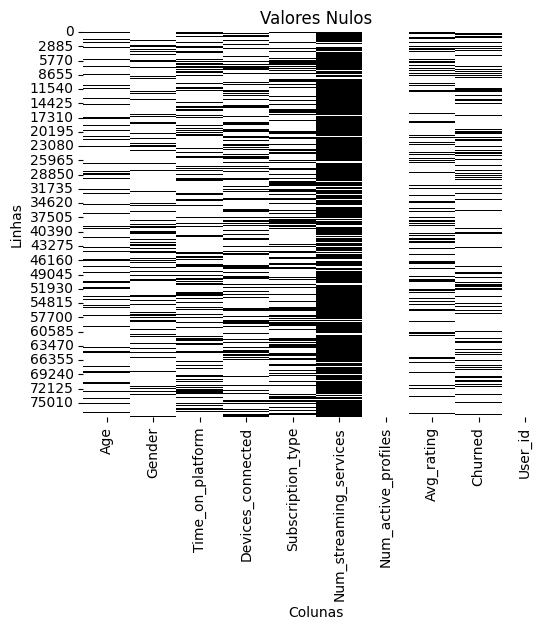

In [68]:
mask = df.isnull()

# Mapa de calor

plt.figure(figsize=(6, 5))
sns.heatmap(mask, cmap='binary', cbar=False)
plt.title('Valores Nulos')
plt.xlabel('Colunas')
plt.ylabel('Linhas')
plt.show()

# **ETAPA 2**

In [69]:
# Data Preparation

#substituindo valores de colunas específicas
valores_substituidos = {'Time_on_platform': 0 ,'Num_streaming_services': 0, 'Churned':0, 'Avg_rating':0, 'Devices_connected':0}
df.fillna(valores_substituidos, inplace=True)

#dropando linhas nulas
colunas_especificas = ['Gender', 'Subscription_type', 'Age']
df.dropna(subset=colunas_especificas, inplace=True)

df.isnull().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [70]:
#transformando valores de churned

df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [71]:
# Transformando valores float em int

float = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services','Avg_rating']
df[float]= df[float].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


# **ETAPA 3**

In [72]:
# Definindo variáveis X e Y para o modelo

X = df.drop(columns=['User_id', 'Churned'])
y = df['Churned']

In [79]:
# Modelagem dos Dados - Regressão Logística

# Codificando variáveis categóricas

le = LabelEncoder()

le.fit(df.Gender)
X['Gender'] = le.fit_transform(X['Gender'])

le.fit(df.Subscription_type)
X = pd.get_dummies(X, columns=['Subscription_type'], drop_first=True)

le.fit(df.Churned)
df.Churned = le.transform(df.Churned)

le.fit(df.User_id)
df.User_id  = le.transform(df.User_id)

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,0,0,3,0,0,19499
1,69,Female,6107,2,2,0,1,2,0,30498
2,44,Male,6374,3,1,1,1,1,1,308
3,26,Male,0,5,0,0,2,0,0,23377
5,54,Male,3024,2,0,0,1,0,0,19436


In [80]:
# Normalização dos dados

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [87]:
# Separando em train e test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
# Realizando a modelagem

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [89]:
# Fazendo previsões no conjunto de teste

y_pred = modelo.predict(X_test)

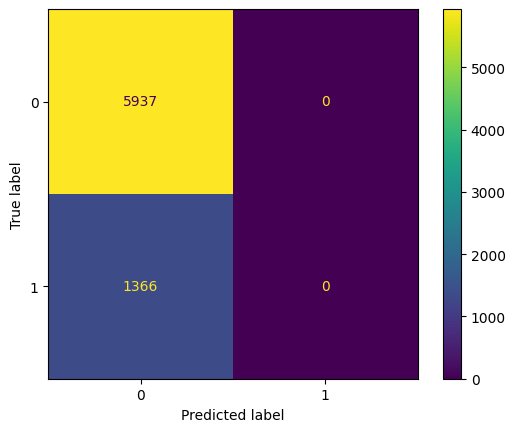

In [92]:
# Plotando a matrix confusão

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [95]:
# Printando métricas de avaliação

print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.81

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.81      1.00      0.90      5937
         Yes       0.00      0.00      0.00      1366

    accuracy                           0.81      7303
   macro avg       0.41      0.50      0.45      7303
weighted avg       0.66      0.81      0.73      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **ETAPA 4**

In [124]:
# Modelagem dos Dados - Tunning e Random Forest

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id,Subscription_type_1,Subscription_type_2
0,49,1,4700,3,0,3,0,0,19499,False,False
1,69,0,6107,2,0,1,2,0,30498,False,True
2,44,1,6374,3,1,1,1,1,308,True,False
3,26,1,0,5,0,2,0,0,23377,False,False
5,54,1,3024,2,0,1,0,0,19436,False,False


In [125]:
X = df[["Age", "Gender", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Num_active_profiles", "Avg_rating", "User_id", "Subscription_type_1", "Subscription_type_2"]]

y = df[["Churned"]]
y = pd.DataFrame(y)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y)

In [127]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print(f"Accuracia Treino:{accuracy_score(y_train, tree.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, tree.predict(X_test))}")

Accuracia Treino:1.0
Accuracia Teste:0.7479118170614816


In [128]:
from sklearn.model_selection import GridSearchCV

parameters = {
"max_depth":[1,2,3,4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(tree, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(tree, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [131]:
tree_tunned = DecisionTreeClassifier(
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 1,
max_features = None,
max_leaf_nodes = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
random_state = None,
splitter = 'best'
)

In [132]:
tree_tunned.fit(X_train, y_train)

print(f"Accuracia Treino:{accuracy_score(y_train, tree_tunned.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, tree_tunned.predict(X_test))}")

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(f"Accuracia Treino:{accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, rf.predict(X_test))}")

Accuracia Treino:0.8067574969190744
Accuracia Teste:0.8067917294262632


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracia Treino:0.9999657674928112
Accuracia Teste:0.8511570587429823


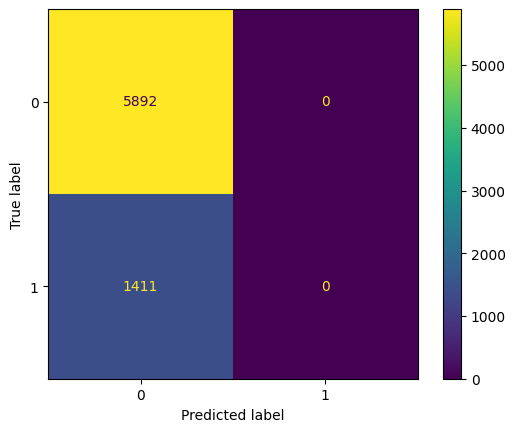

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = [1 if label == 'Yes' else 0 for label in y_pred]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()